## Predict a biological response of molecules from their chemical properties

The objective of the competition is to help us build as good a model as possible so that we can, as optimally as this data allows, relate molecular information, to an actual biological response.

We have shared the data in the comma separated values (CSV) format. Each row in this data set represents a molecule. The first column contains experimental data describing an actual biological response; the molecule was seen to elicit this response (1), or not (0). The remaining columns represent molecular descriptors (d1 through d1776), these are calculated properties that can capture some of the characteristics of the molecule - for example size, shape, or elemental constitution. The descriptor matrix has been normalized.

## Evaluation Metric

Predicted probabilities that a molecule elicits a response are evaluated using the log loss metric.

$$log loss=−\frac{1}{N}\sum_{i=1}^{N}y_{i}\log(\hat{y_{i}})+(1−y_{i})\log(1−\hat{y_{i}})$$

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
# load the train and test files
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [5]:
print 'Shape of training set %s and test set %s ' %(train.shape, test.shape)

Shape of training set (3751, 1777) and test set (2501, 1776) 


## How similar are training and test sets ?

In [35]:
class Similarity(object):
    def __init__(self, X, X_test):
        self.X = X.copy()
        self.X_test = X_test.copy()
    
    def numerical_features(self):
        self.numerical_features = self.X.select_dtypes(exclude=['object']).columns
        return self.numerical_features
    
    def take_pca(self):
        pca = PCA(n_components=2, whiten=True)
        X_train_numerical = self.X[self.numerical_features]
        X_test_numerical = self.X_test[self.numerical_features]
        
        self.X_pca = pca.fit_transform(X_train_numerical)
        self.X_pca_test = pca.transform(X_test_numerical)
        
        return self.X_pca, self.X_pca_test

In [36]:
X = train[train.columns.drop('Activity')]
X_test = test

In [37]:
assert X.shape[1] == X_test.shape[1]

In [38]:
sim = Similarity(X, X_test)

In [39]:
numerical_features = sim.numerical_features()

In [40]:
X_pca, X_pca_test = sim.take_pca()

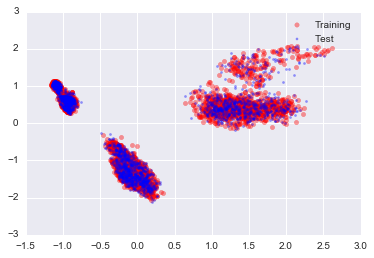

In [44]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='o', color='r', alpha=0.4, label='Training')
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], marker='.', color='b', alpha=0.4, label='Test');
plt.legend(loc='best')
plt.show();